In [ ]:
import numpy as np
import pandas as pd
from sklearn.datasets import make_classification
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression

In [ ]:
X, y = make_classification(n_samples=100, n_features=2, n_informative=1, n_redundant=0, n_classes=2, n_clusters_per_class=1, random_state=41, hypercube=False, class_sep=20)

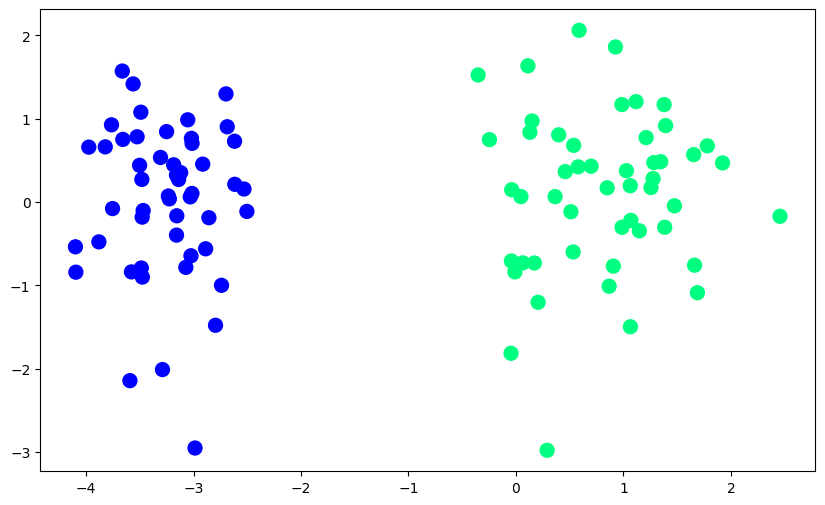

In [ ]:
plt.figure(figsize=(10, 6))
plt.scatter(X[:, 0], X[:, 1], c=y, cmap='winter',s=100)

In [ ]:
class CustomLogisticRegression:

  def __init__(self, lr=0.1, epoch=1000):
    self.lr = lr
    self.epoch = epoch
    self.coef_ = None
    self.intercept_ = None

  def step(self, z):
    return 1 if z > 0 else 0

  def sigmoid(self, z):
    return 1 + np.exp(-z);

  def fit_step(self, X, y):
    X = np.insert(X, 0, 1, axis=1)
    weights = np.ones(X.shape[1]) # coefficients

    for i in range(self.epoch):
      j = np.random.randint(0, X.shape[0])

      y_pred = self.step(np.dot(X[j], weights))
      weights = weights + self.lr*(y[j] - y_pred)*X[j]

      self.coef_ = weights[1:]
      self.intercept_ = weights[0]

  def fit_sigmoid(self, X, y):
    X = np.insert(X, 0, 1, axis=1)
    weights = np.ones(X.shape[1]) # coefficients

    for i in range(self.epoch):
      j = np.random.randint(0, X.shape[0])

      y_pred = self.sigmoid(np.dot(X[j], weights))
      weights = weights + self.lr*(y[j] - y_pred)*X[j]

      self.coef_ = weights[1:]
      self.intercept_ = weights[0]

  def fit_gd(self, X, y):
    X = np.insert(X, 0, 1, axis=1)
    weights = np.ones(X.shape[1]) # coefficients

    for i in range(self.epoch):
      y_pred = self.sigmoid(np.dot(X, weights))
      weights = weights + self.lr*(np.dot((y - y_pred), X))/X.shape[0]

      self.coef_ = weights[1:]
      self.intercept_ = weights[0]

In [ ]:
lg = CustomLogisticRegression(lr=0.1, epoch=1000)
lg.fit_step(X, y)

print(lg.coef_)
print(lg.intercept_)

[1.0198596  0.33857969]
1.3000000000000003


In [ ]:
# Line plotting

m = -(lg.coef_[0] / lg.coef_[1])
c = -(lg.intercept_ / lg.coef_[1])

print(m, c)

x_input = np.linspace(-3, 3, 100)
y_input = m*x_input + c

print(x_input, y_input)

-3.012170035579733 -3.8395687654294357
[-3.         -2.93939394 -2.87878788 -2.81818182 -2.75757576 -2.6969697
 -2.63636364 -2.57575758 -2.51515152 -2.45454545 -2.39393939 -2.33333333
 -2.27272727 -2.21212121 -2.15151515 -2.09090909 -2.03030303 -1.96969697
 -1.90909091 -1.84848485 -1.78787879 -1.72727273 -1.66666667 -1.60606061
 -1.54545455 -1.48484848 -1.42424242 -1.36363636 -1.3030303  -1.24242424
 -1.18181818 -1.12121212 -1.06060606 -1.         -0.93939394 -0.87878788
 -0.81818182 -0.75757576 -0.6969697  -0.63636364 -0.57575758 -0.51515152
 -0.45454545 -0.39393939 -0.33333333 -0.27272727 -0.21212121 -0.15151515
 -0.09090909 -0.03030303  0.03030303  0.09090909  0.15151515  0.21212121
  0.27272727  0.33333333  0.39393939  0.45454545  0.51515152  0.57575758
  0.63636364  0.6969697   0.75757576  0.81818182  0.87878788  0.93939394
  1.          1.06060606  1.12121212  1.18181818  1.24242424  1.3030303
  1.36363636  1.42424242  1.48484848  1.54545455  1.60606061  1.66666667
  1.72727273  

(-3.0, 2.0)

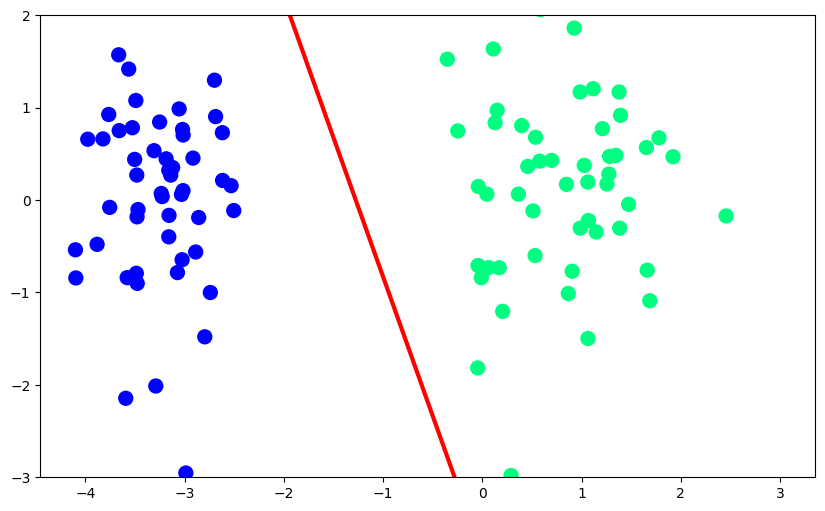

In [ ]:
plt.figure(figsize=(10, 6))
plt.scatter(X[:, 0], X[:, 1], c=y, cmap='winter',s=100)
plt.plot(x_input, y_input, color="red", linewidth=3)
plt.ylim(-3,2)

In [ ]:
lg = CustomLogisticRegression(lr=0.1, epoch=1)
lg.fit_sigmoid(X, y)

print(lg.coef_)
print(lg.intercept_)

[2.47521727 0.41288596]
0.5858859340658039


In [ ]:
# Line plotting

m = -(lg.coef_[0] / lg.coef_[1])
c = -(lg.intercept_ / lg.coef_[1])

print(m, c)

x_input = np.linspace(-3, 3, 100)
y_input = m*x_input + c

print(x_input, y_input)

-5.994917527859322 -1.419001837870071
[-3.         -2.93939394 -2.87878788 -2.81818182 -2.75757576 -2.6969697
 -2.63636364 -2.57575758 -2.51515152 -2.45454545 -2.39393939 -2.33333333
 -2.27272727 -2.21212121 -2.15151515 -2.09090909 -2.03030303 -1.96969697
 -1.90909091 -1.84848485 -1.78787879 -1.72727273 -1.66666667 -1.60606061
 -1.54545455 -1.48484848 -1.42424242 -1.36363636 -1.3030303  -1.24242424
 -1.18181818 -1.12121212 -1.06060606 -1.         -0.93939394 -0.87878788
 -0.81818182 -0.75757576 -0.6969697  -0.63636364 -0.57575758 -0.51515152
 -0.45454545 -0.39393939 -0.33333333 -0.27272727 -0.21212121 -0.15151515
 -0.09090909 -0.03030303  0.03030303  0.09090909  0.15151515  0.21212121
  0.27272727  0.33333333  0.39393939  0.45454545  0.51515152  0.57575758
  0.63636364  0.6969697   0.75757576  0.81818182  0.87878788  0.93939394
  1.          1.06060606  1.12121212  1.18181818  1.24242424  1.3030303
  1.36363636  1.42424242  1.48484848  1.54545455  1.60606061  1.66666667
  1.72727273  1

(-3.0, 2.0)

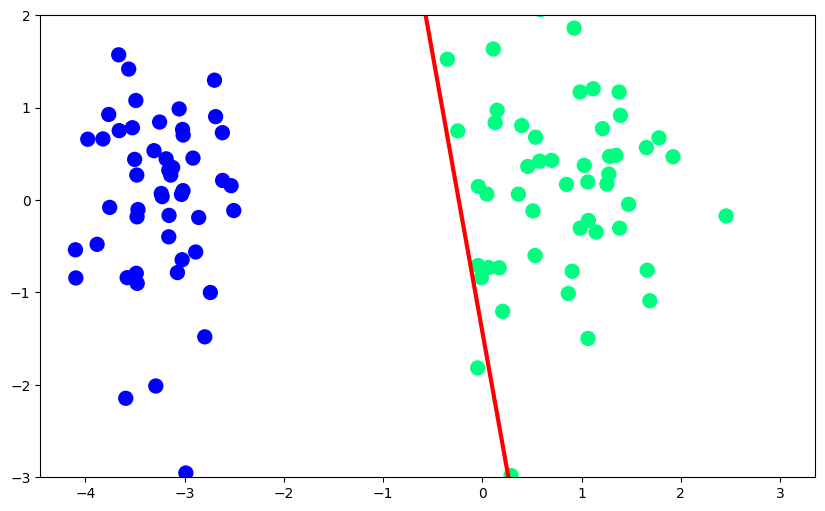

In [ ]:
plt.figure(figsize=(10, 6))
plt.scatter(X[:, 0], X[:, 1], c=y, cmap='winter',s=100)
plt.plot(x_input, y_input, color="red", linewidth=3)
plt.ylim(-3,2)

In [ ]:
lg = CustomLogisticRegression(lr=0.01, epoch=1)
lg.fit_gd(X, y)

print(lg.coef_)
print(lg.intercept_)

[1.30464792 1.09972989]
0.9075220362959378


In [ ]:
# Line plotting

m = -(lg.coef_[0] / lg.coef_[1])
c = -(lg.intercept_ / lg.coef_[1])

print(m, c)

x_input = np.linspace(-3, 3, 100)
y_input = m*x_input + c

print(x_input, y_input)

-1.1863348743500595 -0.8252226726087549
[-3.         -2.93939394 -2.87878788 -2.81818182 -2.75757576 -2.6969697
 -2.63636364 -2.57575758 -2.51515152 -2.45454545 -2.39393939 -2.33333333
 -2.27272727 -2.21212121 -2.15151515 -2.09090909 -2.03030303 -1.96969697
 -1.90909091 -1.84848485 -1.78787879 -1.72727273 -1.66666667 -1.60606061
 -1.54545455 -1.48484848 -1.42424242 -1.36363636 -1.3030303  -1.24242424
 -1.18181818 -1.12121212 -1.06060606 -1.         -0.93939394 -0.87878788
 -0.81818182 -0.75757576 -0.6969697  -0.63636364 -0.57575758 -0.51515152
 -0.45454545 -0.39393939 -0.33333333 -0.27272727 -0.21212121 -0.15151515
 -0.09090909 -0.03030303  0.03030303  0.09090909  0.15151515  0.21212121
  0.27272727  0.33333333  0.39393939  0.45454545  0.51515152  0.57575758
  0.63636364  0.6969697   0.75757576  0.81818182  0.87878788  0.93939394
  1.          1.06060606  1.12121212  1.18181818  1.24242424  1.3030303
  1.36363636  1.42424242  1.48484848  1.54545455  1.60606061  1.66666667
  1.72727273 

(-3.0, 2.0)

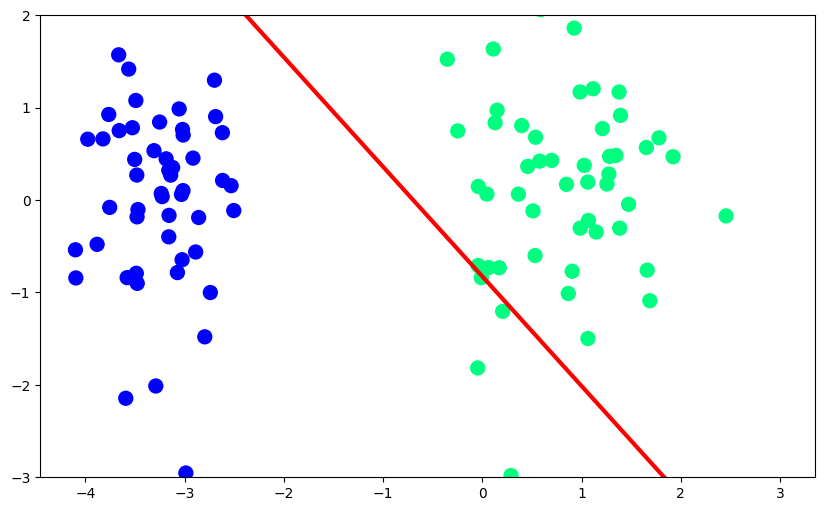

In [ ]:
plt.figure(figsize=(10, 6))
plt.scatter(X[:, 0], X[:, 1], c=y, cmap='winter',s=100)
plt.plot(x_input, y_input, color="red", linewidth=3)
plt.ylim(-3,2)

In [ ]:
lg = LogisticRegression(penalty=None, solver='sag') # penailty -> no regularization
lg.fit(X, y)

print(lg.coef_)
print(lg.intercept_)

[[4.84319609 0.20163662]]
[5.84287648]


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


In [ ]:
# Line plotting

m = -(lg.coef_[0][0] / lg.coef_[0][1])
c = -(lg.intercept_ / lg.coef_[0][1])

print(m, c)

x_input = np.linspace(-3, 3, 100)
y_input = m*x_input + c

print(x_input, y_input)

-24.019426880142593 [-28.97725838]
[-3.         -2.93939394 -2.87878788 -2.81818182 -2.75757576 -2.6969697
 -2.63636364 -2.57575758 -2.51515152 -2.45454545 -2.39393939 -2.33333333
 -2.27272727 -2.21212121 -2.15151515 -2.09090909 -2.03030303 -1.96969697
 -1.90909091 -1.84848485 -1.78787879 -1.72727273 -1.66666667 -1.60606061
 -1.54545455 -1.48484848 -1.42424242 -1.36363636 -1.3030303  -1.24242424
 -1.18181818 -1.12121212 -1.06060606 -1.         -0.93939394 -0.87878788
 -0.81818182 -0.75757576 -0.6969697  -0.63636364 -0.57575758 -0.51515152
 -0.45454545 -0.39393939 -0.33333333 -0.27272727 -0.21212121 -0.15151515
 -0.09090909 -0.03030303  0.03030303  0.09090909  0.15151515  0.21212121
  0.27272727  0.33333333  0.39393939  0.45454545  0.51515152  0.57575758
  0.63636364  0.6969697   0.75757576  0.81818182  0.87878788  0.93939394
  1.          1.06060606  1.12121212  1.18181818  1.24242424  1.3030303
  1.36363636  1.42424242  1.48484848  1.54545455  1.60606061  1.66666667
  1.72727273  1.78

(-3.0, 2.0)

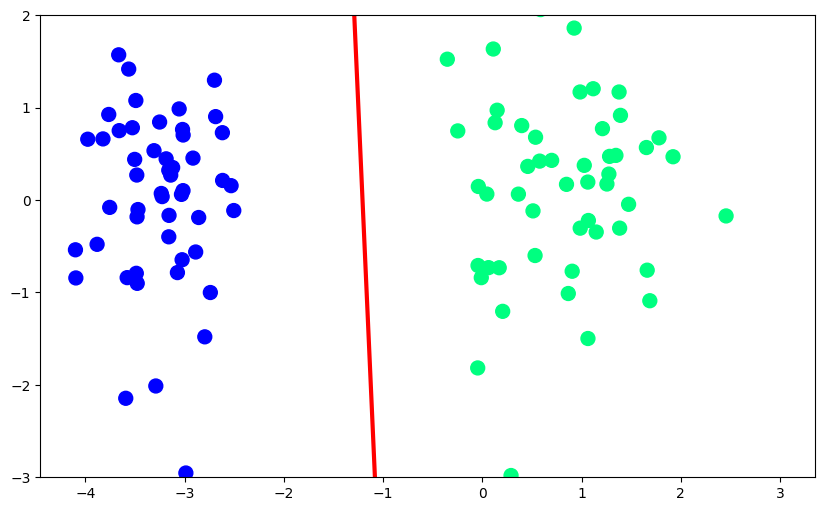

In [ ]:
plt.figure(figsize=(10, 6))
plt.scatter(X[:, 0], X[:, 1], c=y, cmap='winter',s=100)
plt.plot(x_input, y_input, color="red", linewidth=3)
plt.ylim(-3,2)

In [ ]:
class CustomLogisticRegression:

  def __init__(self, lr=0.1, epoch=1000):
    self.lr = lr
    self.epoch = epoch
    self.coef_ = None
    self.intercept_ = None

  def sigmoid(self, z):
    return 1 + np.exp(-z);

  def fit_sigmoid(self, X, y):
    X = np.insert(X, 0, 1, axis=1)
    weights = np.ones(X.shape[1]) # coefficients

    for i in range(self.epoch):
      j = np.random.randint(0, X.shape[0])

      y_pred = self.sigmoid(np.dot(X[j], weights))
      weights = weights + self.lr*(y[j] - y_pred)*X[j]

      self.coef_ = weights[1:]
      self.intercept_ = weights[0]